<h1>Model Development and Evaluation</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv("clean_df.csv")

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-KMPL,highway-KMPL,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,111.0,5000.0,8.928571,11.479592,13495.0,low,0,1,1,0
1,1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,168.8,...,111.0,5000.0,8.928571,11.479592,16500.0,low,0,1,1,0
2,2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,171.2,...,154.0,5000.0,8.078231,11.054422,16500.0,medium,0,1,1,0
3,3,2,164.0,audi,four,sedan,fwd,front,99.8,176.6,...,102.0,5500.0,10.204082,12.755102,13950.0,low,0,1,1,0
4,4,2,164.0,audi,four,sedan,4wd,front,99.4,176.6,...,115.0,5500.0,7.653061,9.353741,17450.0,low,0,1,1,0


In [4]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [5]:
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-KMPL,highway-KMPL,price,diesel,gas,aspiration-std,aspiration-turbo
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,8.928571,11.479592,13495.0,0,1,1,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,8.928571,11.479592,16500.0,0,1,1,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,8.078231,11.054422,16500.0,0,1,1,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,10.204082,12.755102,13950.0,0,1,1,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,7.653061,9.353741,17450.0,0,1,1,0


In [6]:
y_data = df['price']
x_data=df.drop('price',axis=1)

<h2>Functions for Plotting</h2>

In [7]:
#Taking the entire dataset as training dataset.
def linear(var):
    '''
    Input : 
        var : Variable we need to apply for linear regression with Price variable
    Output:
        1.If we are entering multiple variables for linear regression, It will apply the linear regression and 
        give distribution plot at the end.
        2.If we are entering a single variable, it will calculate the linear regression and display a scatter plot,
        a resudual plot and a distributive plot.'''
    
    regressor = LinearRegression()
    list1 = var
    x = df[list1]
    y = df[["price"]]
    regressor.fit(x,y)
    y_pred = regressor.predict(x)
    width = 9
    height = 6
    if len(list1) <= 2:
        plt.figure(figsize=(width,height))
        sns.regplot(x,df["price"])
        plt.title(f"Regression Plot {list1} VS Price")
        plt.show()
    #y_pred[0:5]
    #Find Intercept
    print(f"The Intercept value is {regressor.intercept_}")
    #Find Slope
    print(f"The slope is {regressor.coef_}")
    #R2 value
    print(f"The R2 value is {regressor.score(x,y)}")
    #MSE
    mse = mean_squared_error(y_pred,df["price"])
    print(f"The Mean Square Error value is {mse}")
    print(f"")
    if len(list1) <= 2:
        plt.figure(figsize=(width,height))
        sns.residplot(x,df["price"])
        plt.title(f"Residual Plot {list1} VS Price")
        plt.figure(figsize=(width,height))
    ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
    sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.title("Actual Value VS Predicted Value")
    plt.xlabel("Price of Car")

In [38]:
def distplot(predicted_value):
    '''
    Input:
        predicted_value: Variable we need to plot against variable "Price"
    Output:
        Display a distribution plot'''
    plt.figure(figsize=(9,6))
    ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
    sns.distplot(predicted_value, hist=False, color="b", label="Predicted Value" , ax=ax1)
    plt.title("Distribution Plot between Predicted and Actual Values")
    plt.ylabel("Proportion of Cars")
    plt.show()

In [9]:
#Taking the entire dataset as training datas.
def onepoly(ind,deg):
    '''
    Input:
        ind: Variable we need to plot against variable "Price"
        deg: Order of degree we need to evaluate the One dimensional Polynomial regression.
    Output:
        Apply the one dimensional polynomial regression and plot the scatter plot along with 
        the predicted values.'''
    f = np.polyfit(df[ind],df["price"],deg)
    p = np.poly1d(f)
    print(f"The equation is: {p}")
    numbers = np.linspace(6,23,100)
    plt.figure(figsize=(9,6))
    sns.scatterplot(df["highway-KMPL"],df["price"])
    sns.set_style("whitegrid")
    sns.lineplot(numbers,p(numbers),color="r")
    plt.title(f"1D Polynomial fit with degree {deg}")

In [10]:
def polyplot(vari, degr):
    '''
    Input:
        vari: Variable to be applies against "price" variable for Multi Dimensional Polynomial regression.
        degr: Order of degree for evaluating Multi-Dimensional Polynomial regression.
    Output:
        Apply the Multi-Dimensional Polynomial regression and plot the scatter plot along with the predicted values.'''
    polynomial = PolynomialFeatures(degree=degr)
    poly_train = polynomial.fit_transform(x_train[[vari]])
    regressor = LinearRegression()
    regressor.fit(poly_train,y_train)
    maxx = max(x_train[vari].max(),x_test[vari].max())
    minn = min(x_train[vari].min(),x_test[vari].min())
    newarray = np.linspace(minn,maxx,100)
    predicted_array = regressor.predict(polynomial.fit_transform(newarray.reshape(-1,1)))
    plt.figure(figsize=(9,6))
    sns.scatterplot(x_train[vari],df["price"],color="g")
    sns.scatterplot(x_test[vari],df["price"],color="r")
    sns.lineplot(newarray,predicted_array,color="b")
    plt.show()

<h3>Linear Regression<h3>

C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


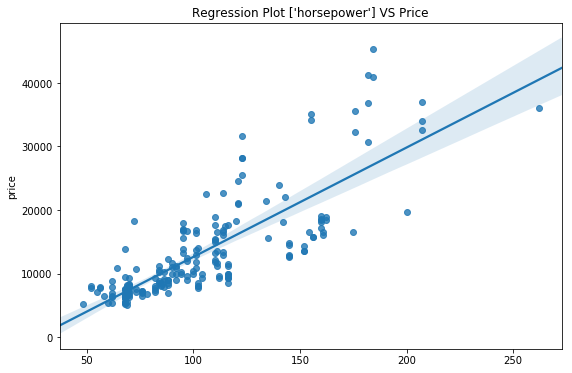

The Intercept value is [-4597.55829789]
The slope is [[172.18312191]]
The R2 value is 0.6554109795391572
The Mean Square Error value is 21654544.39825428



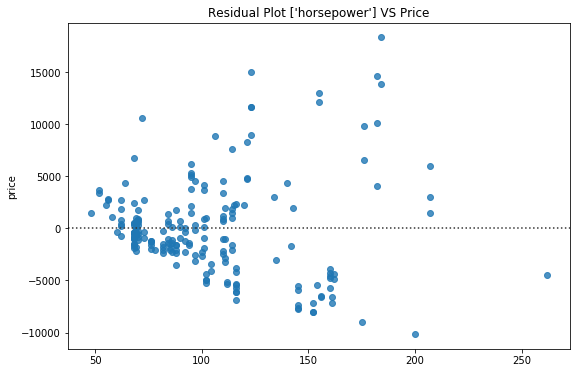

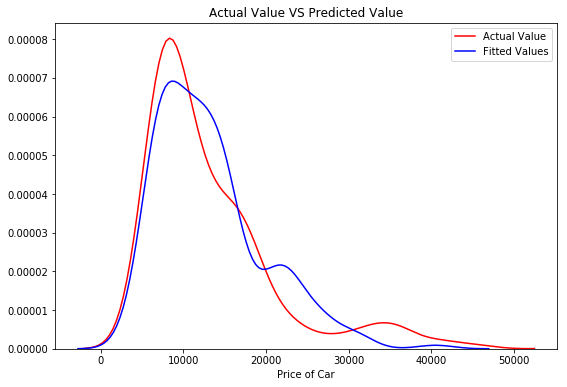

In [11]:
#Single Variable
x_var = ['horsepower']
linear(x_var)

The Intercept value is [-15806.62462633]
The slope is [[53.49574423  4.70770099 81.53026382 84.8072137 ]]
The R2 value is 0.8093562806577458
The Mean Square Error value is 11980366.870726489



C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


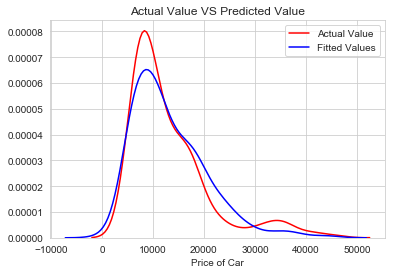

In [15]:
#Multiple Variable
x_var = ['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']
linear(x_var)

<h3>One Dimensional Polynomial Regression</h3>

The equation is:         3        2
-20.25 x + 1133 x - 2.109e+04 x + 1.379e+05


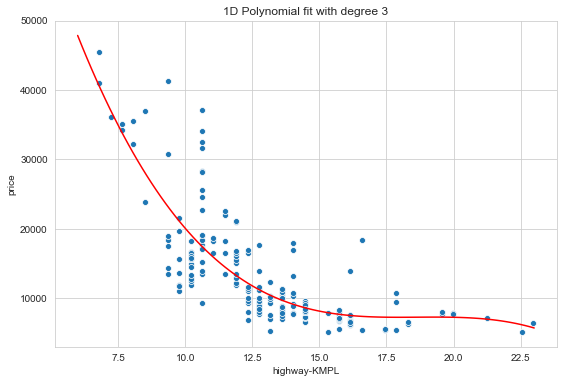

In [17]:
#Single Variable
onepoly("highway-KMPL",3)

<h3>Data Evaluation</h3
<p>Split the given dataset using train_test_split function.</p>

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)
print(f"The Number of train datas are {len(x_train)}")
print(f"The Number of test datas are {len(x_test)}")
lm = LinearRegression()
lm.fit(x_train,y_train)
ypred_test = lm.predict(x_test)
ypred_train = lm.predict(x_train)
print(f"The R Square value between the variables is {lm.score(x_test,y_test)}")

The Number of train datas are 100
The Number of test datas are 101
The R Square value between the variables is 0.7949926117470549


<b>Distribution Plot</b>

<p>Distrubution plot between predicted test datas and actual datas.</p>

C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


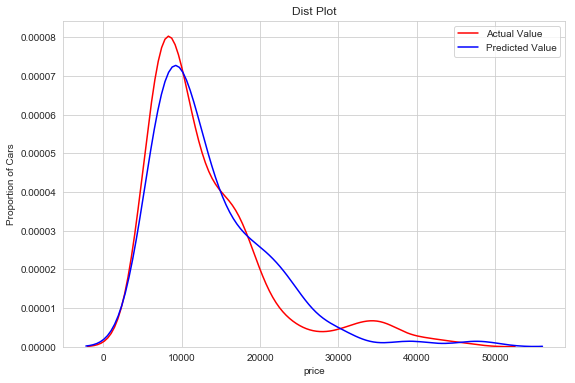

In [21]:
distplot(ypred_test)

<p>Distrubution plot between predicted train datas and actual datas.</p>

C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


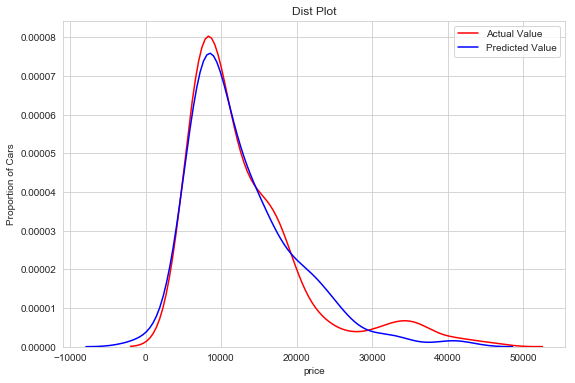

In [22]:
distplot(ypred_train)

<h3>Cross Validation</h3>

<b>Cross Validation - Score<b/>

In [23]:
cross = cross_val_score(lm, x_data, y_data, cv=4)
print(f"All Cross Validation score: {cross}")
print(f"The mean of Cross Validated R2 is {cross.mean()} and the Standard Deviation is {cross.std()}")

All Cross Validation score: [0.7597167  0.81707626 0.30186768 0.28576939]
The mean of Cross Validated R2 is 0.5411075065865258 and the Standard Deviation is 0.24818439628530567


<b>Cross Validation Predict</b>

Distribution Plot between predicted train datas and Actual train datas.


C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


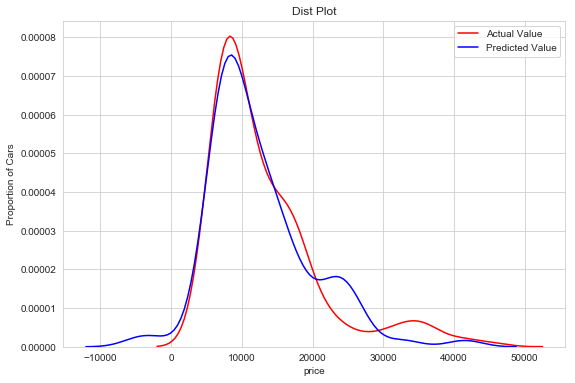

     Actual Train Value  Predicted Train Value
191             13415.0           16054.786639
50               6695.0            6242.496110
0               13495.0           12178.365983
94               7999.0            6966.176840
110             16695.0           25028.346366
95               8249.0            7408.815909
64              25552.0           24089.160681
167             11549.0           12758.317208
41              10345.0            8839.443232
69              35056.0           26911.356213
Distribution Plot between predicted test datas and actual test datas.


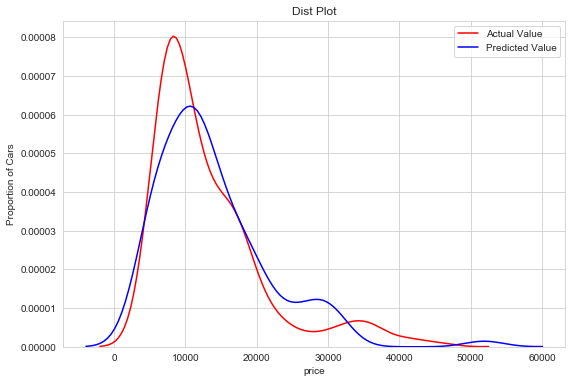

     Actual Test Value  Predicted Test Value
18              6295.0           5585.487660
170            10698.0          11450.790440
107            13860.0          20291.220605
98             13499.0          22216.984305
177            15750.0          19517.367788
182             8495.0          10347.797207
5              15250.0          17309.411246
146             5348.0           4905.693475
12             21105.0          12247.522658
152             6938.0           5545.994099


In [26]:
ycpred_train = cross_val_predict(lm, x_train, y_train, cv=4)
ycpred_test = cross_val_predict(lm, x_test, y_test, cv=4)
print("Distribution Plot between predicted train datas and Actual train datas.")
distplot(ycpred_train)
print(pd.DataFrame({"Actual Train Value":y_train[0:10],"Predicted Train Value":ycpred_train[0:10]}))
print("Distribution Plot between predicted test datas and actual test datas.")
distplot(ycpred_test)
print(pd.DataFrame({"Actual Test Value":y_test[0:10],"Predicted Test Value":ycpred_test[0:10]}))

<h3>Polynomial Regression</h3>

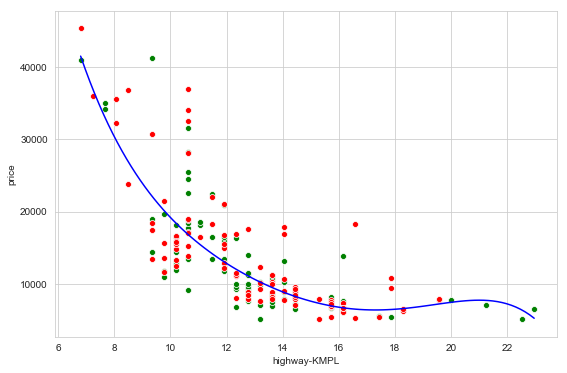

In [29]:
polyplot("highway-KMPL",5)

Distribution Plot between Predicted train datas and Actual train datas.


C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


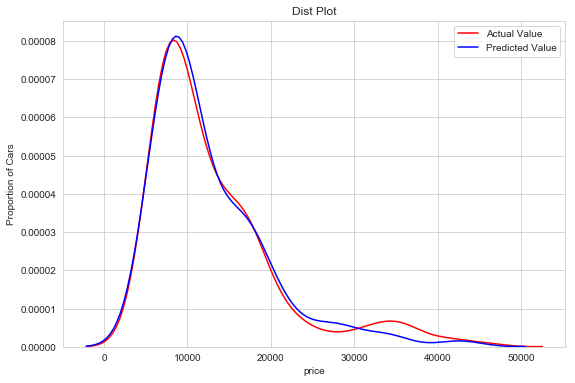

     Actual Value  Predicted Value
191       13415.0     17084.545671
50         6695.0      6701.249308
0         13495.0     11235.054891
94         7999.0      7069.651585
110       16695.0     16461.704410
95         8249.0      6828.451477
64        25552.0     25952.284532
167       11549.0     13533.908305
41        10345.0      9107.418893
69        35056.0     33222.322322
Distribution Plot between Predicted test datas and Actual test datas.


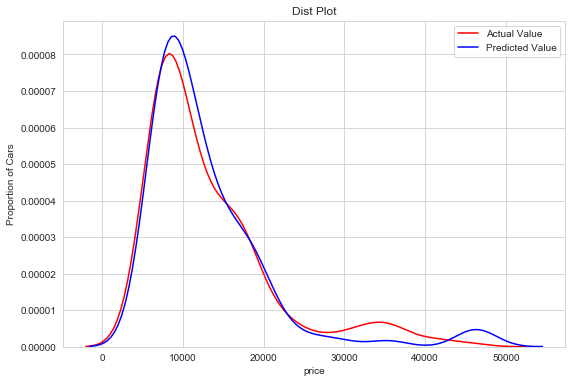

     Actual Value  Predicted Value
18         6295.0      6378.095264
170       10698.0     10229.683082
107       13860.0     20472.007071
98        13499.0     19291.082902
177       15750.0     20600.372384
182        8495.0      8841.702854
5         15250.0     10321.620405
146        5348.0      6782.194273
12        21105.0     13871.149753
152        6938.0      7379.880514


In [31]:
#Taking entire variable to fit the polynomial regression. 
polynomial  = PolynomialFeatures(degree=2)
poly_train = polynomial.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']])
poly_test = polynomial.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']])
poly = LinearRegression()
poly.fit(poly_train,y_train)
polypred_test = poly.predict(poly_test)
polypred_train = poly.predict(poly_train)
print("Distribution Plot between Predicted train datas and Actual train datas.")
distplot(polypred_train)
print(pd.DataFrame({"Actual Value":y_train[0:10],"Predicted Value":polypred_train[0:10]}))
print("Distribution Plot between Predicted test datas and Actual test datas.")
distplot(polypred_test)
print(pd.DataFrame({"Actual Value":y_test[0:10],"Predicted Value":polypred_test[0:10]}))

In [32]:
def rsquare_plot(degr):
    degree_list = []
    order = np.arange(1,degr)
    for i in order:
        poly_regr = PolynomialFeatures(degree=i)
        linregr = LinearRegression()
        polyxtrain = poly_regr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']])
        polyxtest = poly_regr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']])
        linregr.fit(polyxtrain,y_train)
        degree_value = linregr.score(polyxtest,y_test)
        degree_list.append(degree_value)
    plt.figure(figsize=(9,6))
    sns.lineplot(order,degree_list)
    plt.title(f"The R-Square Plot for 1 to {degr} degree")
    plt.xlabel("Degree")
    plt.ylabel("R-Square Value")

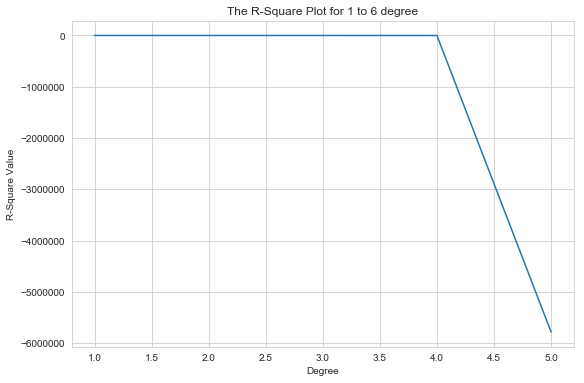

In [33]:
rsquare_plot(6)

<h3>Ridge Regression</h3>

Here we will apply the Ridge Regression and see how the Model changes with different hyperparameters Alpha.

Alpha Value : 10000
The R-Square value for train data is: 0.8615852372567953
The R-Square value for test data is: 0.5285890433106503


C:\Users\Srudeep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


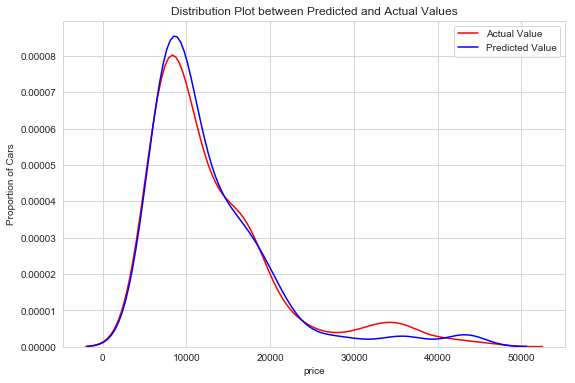

In [39]:
polynomialnew=PolynomialFeatures(degree=2)
x_train_polynomial=polynomialnew.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL','normalized-losses','symboling']])
x_test_polynomial=polynomialnew.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL','normalized-losses','symboling']])
alp = 10000
ridgemodel = Ridge(alpha=alp)
ridgemodel.fit(x_train_polynomial,y_train)
ypredridge = ridgemodel.predict(x_test_polynomial)
print(f"Alpha Value : {alp}")
print(f"The R-Square value for train data is: {ridgemodel.score(x_train_polynomial,y_train)}")
print(f"The R-Square value for test data is: {ridgemodel.score(x_test_polynomial,y_test)}")
distplot(ypredridge)

Let see the values of R-Square with different Alpha Values.

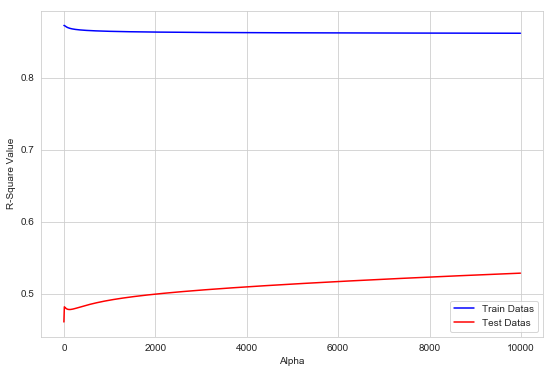

In [87]:
ridgenum = np.arange(0,1000)*10
xtrainscore = []
xtestscore = []
for i in ridgenum:
    ridgemodel = Ridge(alpha=i)
    ridgemodel.fit(x_train_polynomial,y_train)
    xtrainscore.append(ridgemodel.score(x_train_polynomial,y_train))
    xtestscore.append(ridgemodel.score(x_test_polynomial,y_test))
plt.figure(figsize=(9,6))
sns.lineplot(ridgenum,xtrainscore,color="b",label="Train Datas")
sns.lineplot(ridgenum,xtestscore,color="r", label="Test Datas")
plt.xlabel("Alpha")
plt.ylabel("R-Square Value")
plt.show()

The red line indicates test datas, and the blue line indicates the Train datas.

<h3>Grid Search</h3>

Lets find the best hyperparameter value using Grid Search.

In [41]:
newnum = [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]
newridge = Ridge()
parameter = [{"alpha":newnum}]
grid = GridSearchCV(newridge, parameter, cv=4)
grid.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']],y_data)
bestgrid = grid.best_estimator_
best_score = bestgrid.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-KMPL']],y_test)

In [42]:
best_score

0.8331144577546475